Question:
- How many times do people view the item before purchase.
- what time and what day have the highest traffic of people viewing products
- what date have the most sales and least sales.
- How loyal are people to a brand. (How often the same individual repurchases an items from the same brand.)
- When the person purchased the item, what other item did the person also purchase at the same time? (using the association rules)

In [29]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv('2019-Oct.csv')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [4]:
df.describe()

,product_id,category_id,price,user_id
count,4.244876e+07,4.244876e+07,4.244876e+07,4.244876e+07
mean,1.054993e+07,2.057404e+18,2.903237e+02,5.335371e+08
std,1.188191e+07,1.843926e+16,3.582692e+02,1.852374e+07
min,1.000978e+06,2.053014e+18,0.000000e+00,3.386938e+07
25%,1.005157e+06,2.053014e+18,6.598000e+01,5.159043e+08
50%,5.000470e+06,2.053014e+18,1.629300e+02,5.296965e+08
75%,1.600030e+07,2.053014e+18,3.585700e+02,5.515788e+08
max,6.050001e+07,2.175420e+18,2.574070e+03,5.662809e+08


In [5]:
df.count()

event_time       42448764
event_type       42448764
product_id       42448764
category_id      42448764
category_code    28933155
brand            36331684
price            42448764
user_id          42448764
user_session     42448762
dtype: int64

In [6]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [7]:
print(df['event_type'].nunique())
print(df['event_type'].unique())

3
['view' 'purchase' 'cart']


In [8]:
print(df['product_id'].nunique())
print(df['category_id'].nunique())
print(df['category_code'].nunique())
print(df['brand'].nunique())
print(df['user_id'].nunique())

166794
624
126
3444
3022290


In [9]:
event_type_percentages = df['event_type'].value_counts(normalize=True) * 100
print(event_type_percentages)

event_type
view        96.067341
cart         2.182669
purchase     1.749990
Name: proportion, dtype: float64


In [10]:
min_spending = df['price'].min()
max_spending = df['price'].max()
avg_spending = df['price'].mean()

print(f"Minimum spending: ${min_spending:.2f}")
print(f"Maximum spending: ${max_spending:.2f}")
print(f"Average spending: ${avg_spending:.2f}")

Minimum spending: $0.00
Maximum spending: $2574.07
Average spending: $290.32


Summary of DATA:

| Property    | Description |   Type   |   Note  |
| --------    | -------     | -------- | ------- |
| event_time  | Time when event happened at (in UTC).                                                                                                                          | datetime64  | total of 42448764 time stamp   |
| event_type  | Only one kind of event: purchase.                                                                                                                              | object |  3 event type in total view = 96%, cart = 2.2% and purchase = 1.7%   |
| product_id  | ID of a product                                                                                                                                                | int64    | 166794 unique product   |
| category_id | Product's category ID                                                                                                                                          | int64    | 624 unique category ID   |
|category_code| Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories| object    |126 unique category code   |
| brand       | Downcased string of brand name. Can be missed.                                                                                                                 | object    | 3444 unique brand   |
| price     | Float price of a product. Present.                                                                                                                               | float64    |  min spend = $0.00, spend = $2547 and average spending = $290   |
| user_id| Permanent user ID.                                                                                                                                                  | int64    | 3022290 user active this month   |
| user_session | Product's category ID                                                                                                                                         | object    |    |


In [5]:
df[['main_category', 'sub_category']] = df['category_code'].str.split('.', n=1, expand=True)
print('Split successfully')

Split successfully


In [12]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,sub_category
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,NaN,NaN
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,appliances,environment.water_heater
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,furniture,living_room.sofa
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,computers,notebook
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,electronics,smartphone
...,...,...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193,electronics,camera.video
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8,NaN,NaN
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd,auto,accessories.player
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204,electronics,clocks


In [13]:
new_df = df[['event_time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']]
new_df

,event_time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances,environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture,living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers,notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics,smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics,camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto,accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics,clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [14]:
mainCat_values = new_df.groupby('main_category')['product_id'].nunique().sort_values(ascending=False)
mainCat_names = mainCat_values.index
mainCat_values

main_category
electronics     14950
apparel         13417
appliances      12362
computers        7930
furniture        6972
construction     5701
kids             5123
accessories      2516
sport            2157
auto             1201
stationery        607
country_yard      185
medicine           29
Name: product_id, dtype: int64

Number of main-categories:  13


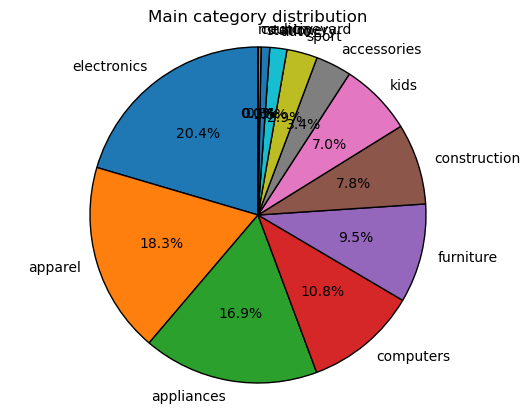

In [15]:
print('Number of main-categories: ', len(mainCat_names))
fig, ax = plt.subplots()
ax.pie(mainCat_values, labels=mainCat_names, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Main category distribution", x=0.50)
plt.show()


In [16]:
subCat_values = new_df.groupby('sub_category')['product_id'].nunique().sort_values(ascending=False)
subCat_names = subCat_values.index
subCat_values

sub_category
clocks                     7788
shoes                      6156
shoes.keds                 2262
toys                       2138
audio.headphone            2134
                           ... 
shoes.espadrilles             7
furniture.hammok              6
accessories.anti_freeze       4
furniture.bench               4
tools.soldering               2
Name: product_id, Length: 126, dtype: int64

In [17]:
new_df['event_time'] = pd.to_datetime(new_df['event_time'])
new_df['date'] = pd.to_datetime(new_df['event_time'].dt.date)
new_df['time'] = new_df['event_time'].dt.time
new_df['weekday'] = new_df['date'].dt.weekday

/var/folders/hv/0mg1x66j16ldl69jbflkvgvm0000gn/T/ipykernel_44425/2446899979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['event_time'] = pd.to_datetime(new_df['event_time'])


In [18]:
new_df.drop('event_time', axis='columns')
new_df = new_df[['date', 'weekday', 'time', 'event_type', 'product_id', 'category_id', 'main_category', 'sub_category', 'brand', 'price', 'user_id', 'user_session']]
new_df.head(5)

,date,weekday,time,event_type,product_id,category_id,main_category,sub_category,brand,price,user_id,user_session
0,2019-10-01,1,00:00:00,view,44600062,2103807459595387724,NaN,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01,1,00:00:00,view,3900821,2053013552326770905,appliances,environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01,1,00:00:01,view,17200506,2053013559792632471,furniture,living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01,1,00:00:01,view,1307067,2053013558920217191,computers,notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01,1,00:00:04,view,1004237,2053013555631882655,electronics,smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [19]:
new_df['date'] = new_df['date'].astype(str)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   weekday        int32  
 2   time           object 
 3   event_type     object 
 4   product_id     int64  
 5   category_id    int64  
 6   main_category  object 
 7   sub_category   object 
 8   brand          object 
 9   price          float64
 10  user_id        int64  
 11  user_session   object 
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 3.6+ GB


/var/folders/hv/0mg1x66j16ldl69jbflkvgvm0000gn/T/ipykernel_44425/1163371182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = new_df['date'].astype(str)


In [20]:
new_df['hour'] = new_df['time'].apply(lambda t: t.hour)


In [21]:
event_types = ['view', 'cart', 'purchase']

event_by_hour = {}
for event_type in event_types:
    event_count = new_df[new_df.event_type == event_type].groupby("hour")["event_type"].count()
    event_by_hour[event_type] = event_count

event_by_hour = pd.DataFrame(event_by_hour)

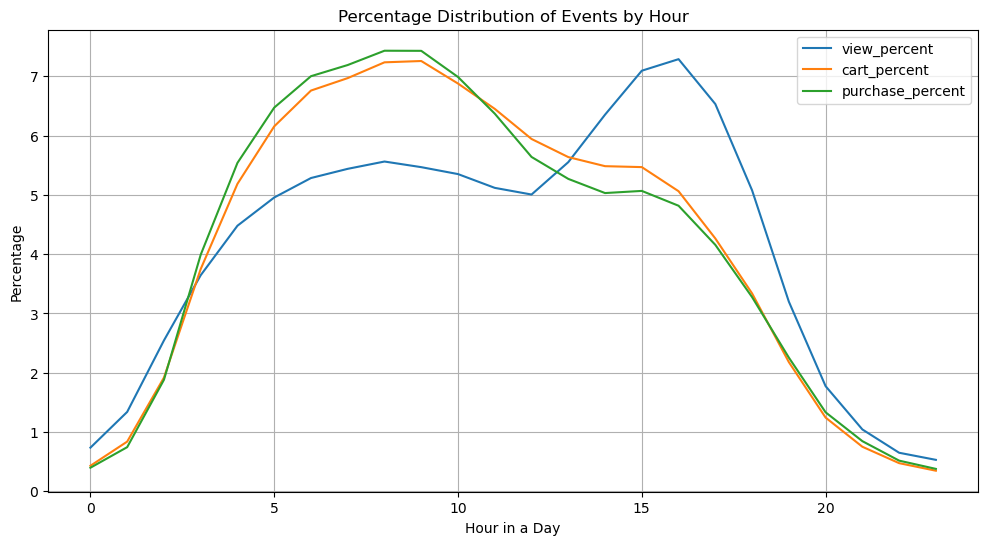

In [22]:
for event_type in event_types:
    event_by_hour[f'{event_type}_percent'] = event_by_hour[event_type] / event_by_hour[event_type].sum() * 100

# Line plot
plt.figure(figsize=(12, 6))
for event_type in event_types:
    plt.plot(event_by_hour.index, event_by_hour[f'{event_type}_percent'], label=f'{event_type}_percent')

plt.title("Percentage Distribution of Events by Hour")
plt.xlabel("Hour in a Day")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
order_per_weekday = new_df[new_df.event_type == "purchase"].groupby("weekday")["event_type"].count().reset_index()
order_per_weekday.head(10)



,weekday,event_type
0,0,96062
1,1,114510
2,2,119159
3,3,113664
4,4,103044
5,5,96177
6,6,100233


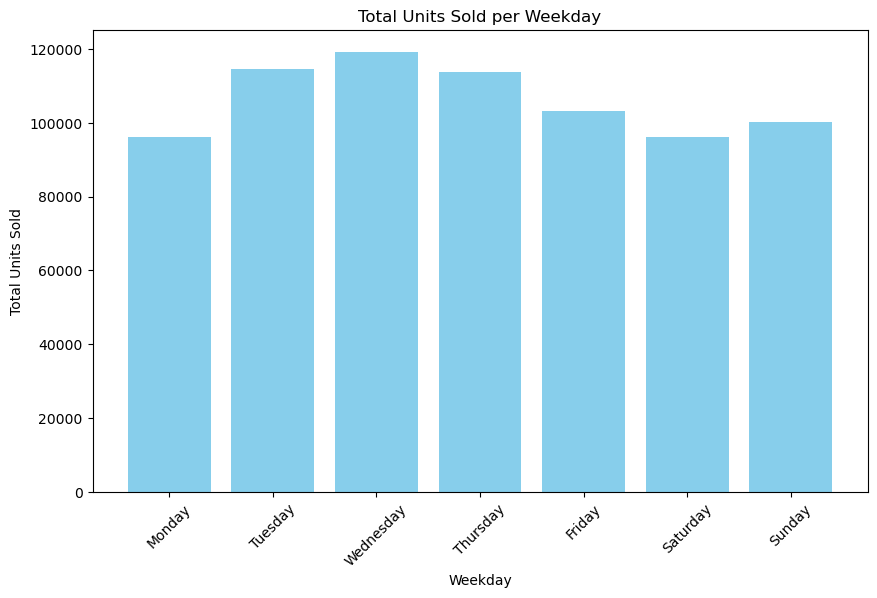

In [24]:
# Calculate total units sold per weekday
order_per_weekday = new_df[new_df.event_type == "purchase"].groupby("weekday")["event_type"].count().reset_index()

# Map weekday numbers to names
weekday_names = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
order_per_weekday['weekday'] = order_per_weekday['weekday'].map(weekday_names)

# Plot the total units sold per weekday
plt.figure(figsize=(10, 6))
plt.bar(order_per_weekday['weekday'], order_per_weekday['event_type'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold per Weekday')
plt.xticks(rotation=45)
plt.show()


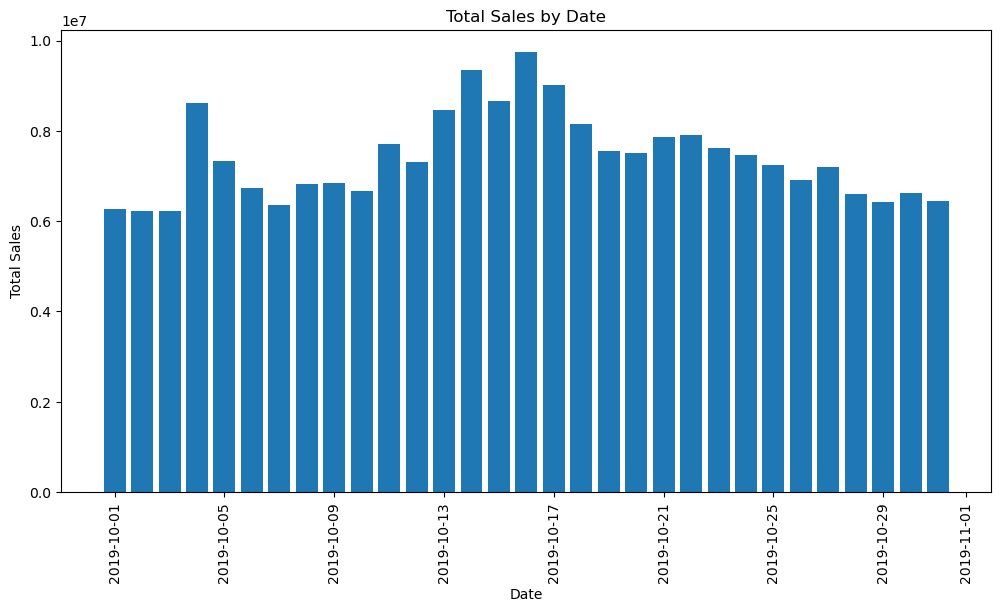

In [25]:
df['event_time'] = pd.to_datetime(df['event_time'])
df['date'] = df['event_time'].dt.date
purchase_df = df[df['event_type'] == 'purchase']
daily_sales = purchase_df.groupby('date')['price'].sum().reset_index()

plt.figure(figsize=(12,6))
bars = plt.bar(daily_sales['date'], daily_sales['price'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Date')
plt.xticks(rotation=90)


plt.show()


In [26]:
most_sales_date = daily_sales.loc[daily_sales['price'].idxmax()]
min_sales_date = daily_sales.loc[daily_sales['price'].idxmin()]

print(f"Most sales: {most_sales_date['date']}: {most_sales_date['price']}")
print(f"Least sales: {min_sales_date['date']}: {min_sales_date['price']}")

Most sales: 2019-10-16: 9747239.24
Least sales: 2019-10-02: 6213628.53


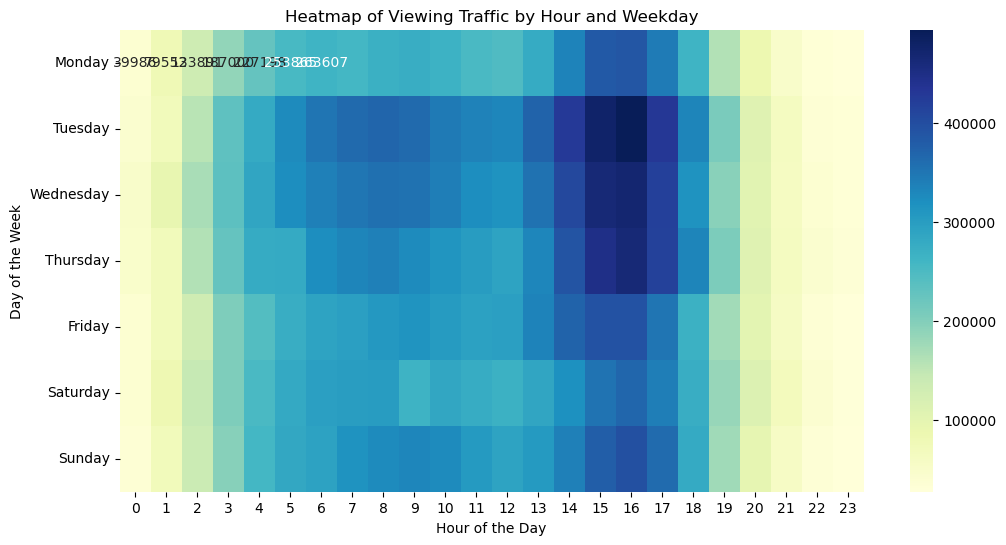

In [27]:
import seaborn as sns

view_counts = new_df[new_df['event_type'] == 'view'].groupby(['weekday', 'hour']).size().unstack()

# Map weekday numbers to names
weekday_names = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
view_counts.index = view_counts.index.map(weekday_names)

plt.figure(figsize=(12,6))
sns.heatmap(view_counts,cmap="YlGnBu",annot=True, fmt="d")
plt.title('Heatmap of Viewing Traffic by Hour and Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


In [28]:
purchase_data = df[df['event_type'] == 'purchase']


In [29]:
purchase_data['date'] = purchase_data['event_time'].dt.date
sales_by_date = purchase_data.groupby('date').size().sort_values(ascending=False)
sales_by_date


/var/folders/hv/0mg1x66j16ldl69jbflkvgvm0000gn/T/ipykernel_44425/3448799479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_data['date'] = purchase_data['event_time'].dt.date


date
2019-10-16    31394
2019-10-13    29561
2019-10-14    28405
2019-10-17    28318
2019-10-04    27041
2019-10-15    26372
2019-10-11    26224
2019-10-18    25850
2019-10-22    25385
2019-10-12    25373
2019-10-21    25167
2019-10-20    25098
2019-10-23    24731
2019-10-19    24657
2019-10-24    23999
2019-10-25    23929
2019-10-05    23494
2019-10-27    23403
2019-10-08    23072
2019-10-09    22748
2019-10-26    22653
2019-10-06    22171
2019-10-10    21993
2019-10-07    21378
2019-10-28    21112
2019-10-30    20817
2019-10-29    20374
2019-10-31    20099
2019-10-02    19469
2019-10-01    19307
2019-10-03    19255
dtype: int64

In [30]:
from scipy.stats import ttest_ind

weekend_sales = purchase_data[purchase_data['event_time'].dt.dayofweek >= 5].groupby('date').size()
weekday_sales = purchase_data[purchase_data['event_time'].dt.dayofweek < 5].groupby('date').size()

t_stat, p_value = ttest_ind(weekend_sales, weekday_sales)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.6201632574068122, P-value: 0.539993425770068


In [33]:
from scipy.stats import pearsonr


df['purchase_time'] = pd.to_datetime(df['event_time'])

sales_by_date = df[df['event_type'] == 'purchase'].groupby(df['purchase_time'].dt.date).size().reset_index(name='sales_count')

sales_by_date['date_ordinal'] = pd.to_datetime(sales_by_date['purchase_time']).apply(lambda x: x.toordinal())

correlation, p_value = pearsonr(sales_by_date['date_ordinal'], sales_by_date['sales_count'])

print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson correlation coefficient: 0.02177988174088357
P-value: 0.9074183321507013


In [35]:
from scipy.stats import chi2_contingency

# temp_df = df.sample(n=10000, random_state=42)

df['event_time'] = pd.to_datetime(df['event_time'])

df['hour'] = df['event_time'].dt.hour
df['day_of_week'] = df['event_time'].dt.dayofweek

df['is_weekend'] = df['day_of_week'] >= 5
df['is_evening'] = (df['hour'] >= 12) & (df['hour'] < 17)
view_data = df[df['event_type'] == 'view']
contingency_table = pd.crosstab(view_data['is_weekend'], view_data['is_evening'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis (H₀): Product views are dependent on the day of the week and time of day.")
else:
    print("Fail to reject the null hypothesis (H₀): Product views are independent of the day of the week and time of day.")


Chi2 Stat: 11202.846276248023, P-value: 0.0
Reject the null hypothesis (H₀): Product views are dependent on the day of the week and time of day.


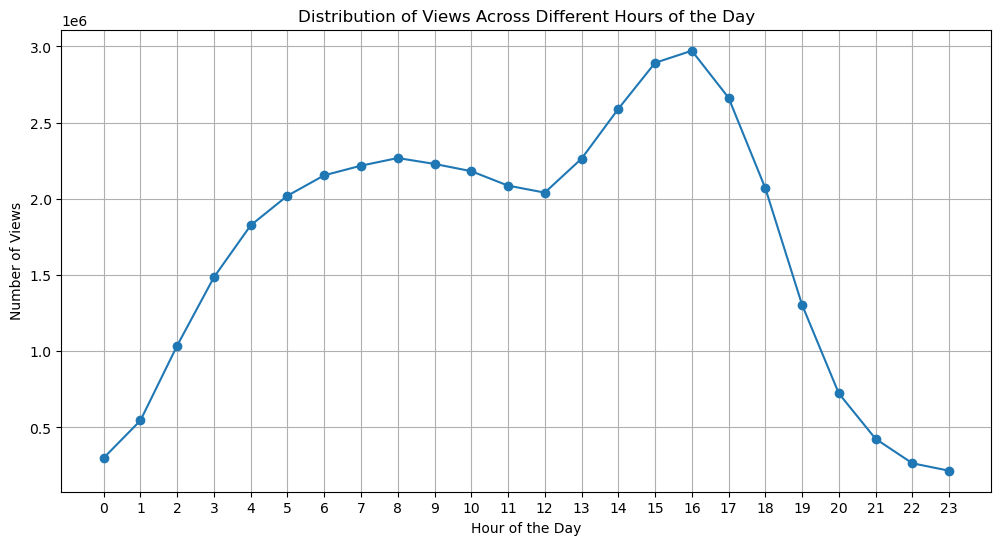

In [12]:
# Group by hour and count the number of views
hourly_views = df[df['event_type'] == 'view'].groupby('hour').size()

# Plot the distribution of views across different hours of the day
plt.figure(figsize=(12, 6))
plt.plot(hourly_views.index, hourly_views.values, marker='o')
plt.title('Distribution of Views Across Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Views')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

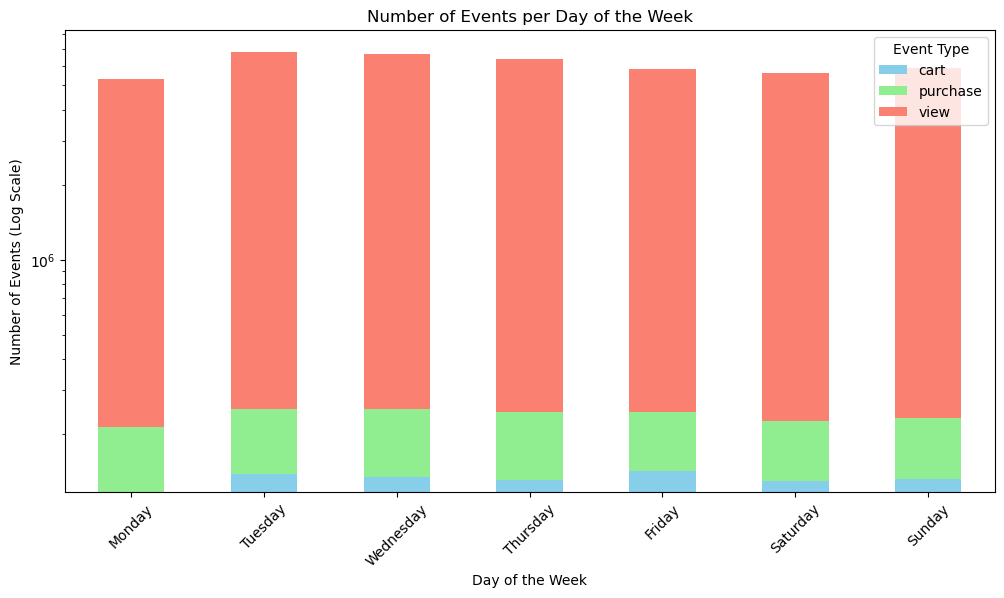

In [22]:
events_per_day = df.groupby(['day_of_week', 'event_type']).size().unstack().fillna(0)

weekday_names = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
events_per_day.index = events_per_day.index.map(weekday_names)

plt.figure(figsize=(12, 6))
events_per_day.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'salmon'], ax=plt.gca())
plt.yscale('log')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events (Log Scale)')
plt.title('Number of Events per Day of the Week')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.show()

Q.2) What time and what day have the highest traffic of people viewing products?

Hypothesis: most product views occur during weekends or evenings when users have more free time compared to weekdays or working hours

$H_0$: Product views are independent of the day of the week and the time of day (i.e., there is no difference in viewing patterns

$H_1$: Product views are dependent on the day of the week and time of day (i.e., there are more views during weekends/evenings.

with Chi2 Stat: 11202.846276248023, P-value: 0.0
Reject the null hypothesis (H₀): 

Thus Product views are dependent on the day of the week and time of day. Which mean more views occur during the afternoon. When they have more free time.


Q.3) what date have the most sales and least sales.

Hypothesis: Sales are higher on certain dates (e.g., weekends) compared to regular weekdays.

$H_0$: There is no difference in sales between weekends and weekdays.

$H_1$: There is a Sales on weekends are significantly different from weekdays.

After performing an t-test we got a P-value of 0.53 which is higher than 0.05 thus we fail to reject the null hypothesis. Which show that there are no high differences between the sales in weekdays and weekends.



# How loyal are people to a brand

Hypothesis: People are more likely to be loyal to a brand and purchase multiple items from the same brand.

$H_0$: There is significantly more users who purchased item from different brands.

$H_1$: There is significantly more users who purchased multiple items from the same brand.

After performing a chi-squared test we got a P-value of 1 which is higher than the alpha of 0.05 thus we fail to reject the null hypothesis. Which show that there are not a significant number of user loyal to a single brand.


In [39]:
# Filter the DataFrame to only have user who purchased something
purchase_df = df[df['event_type'] == 'purchase']['user_id'].unique()

# Mean number of purchases per user
print("Mean number of purchases per user:", df.groupby('user_id').size().loc[purchase_df].mean())

Mean number of purchases per user: 40.83120149344027


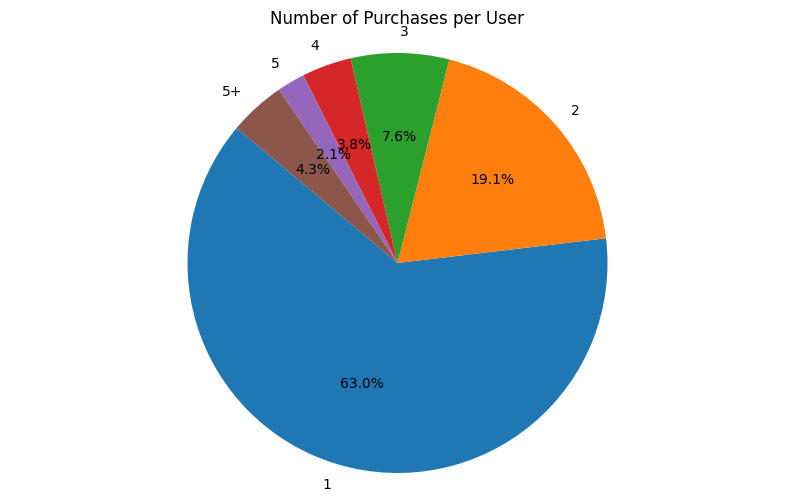

In [23]:
# The number of perchaces per user
purchase_counts = df[df['event_type'] == 'purchase'].groupby('user_id').size()
user_counts = purchase_counts.value_counts()

# Group users with more than 5 purchases into a single category
user_counts_grouped = user_counts.copy()
user_counts_grouped.loc[6:] = user_counts[6:].sum()
user_counts_grouped = user_counts_grouped[:6]

index_list = user_counts_grouped.index.tolist()
index_list[-1] = '5+'
user_counts_grouped.index = index_list

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(user_counts_grouped.values, labels=user_counts_grouped.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Number of Purchases per User')
plt.show()

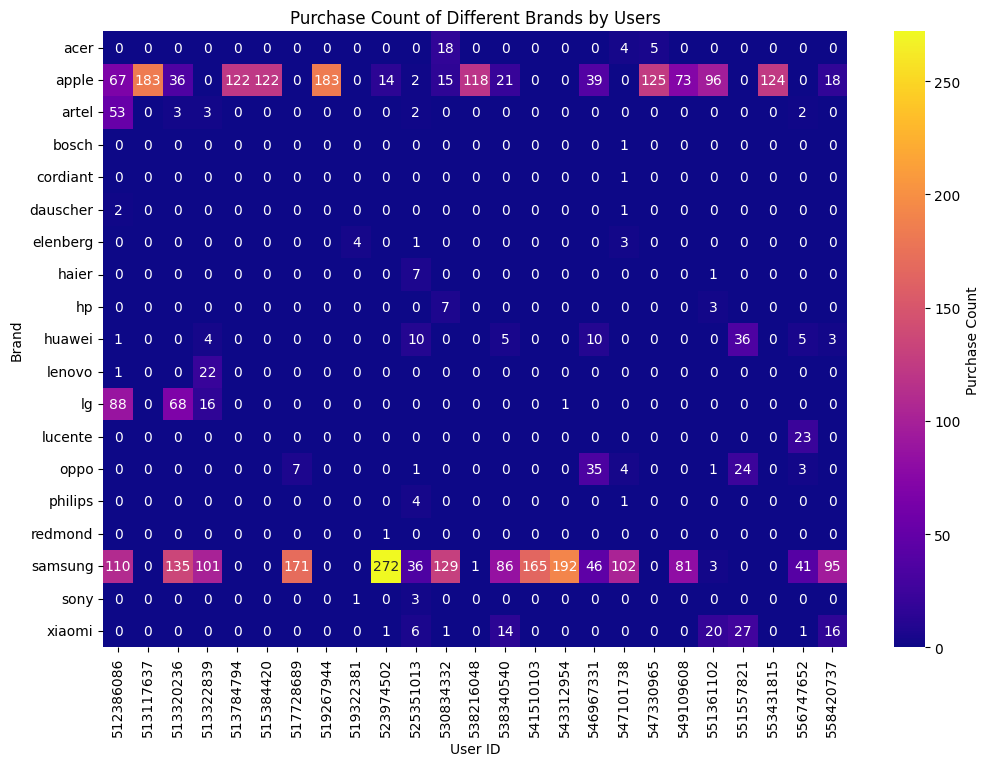

In [54]:
# Heatmap of purchase count by of the top 25 brands by the top 25 users
purchase_df = df[df['event_type'] == 'purchase']

top_brands = purchase_df['brand'].value_counts().head(25).index
top_users = purchase_df['user_id'].value_counts().head(25).index
filtered_df = purchase_df[purchase_df['brand'].isin(top_brands) & purchase_df['user_id'].isin(top_users)]

pivot_table = filtered_df.pivot_table(index='brand', columns='user_id', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="plasma", cbar_kws={'label': 'Purchase Count'})
plt.xlabel('User ID')
plt.ylabel('Brand')
plt.title('Purchase Count of Different Brands by Users')
plt.show()

In [31]:
# Calculate the number of loyal customers for each brand
purchase_df = df[df['event_type'] == 'purchase']
purchase_df = purchase_df.sort_values(by=['user_id', 'event_time'])
purchase_counts = purchase_df.groupby(['user_id', 'brand']).size().reset_index(name='purchase_count')
purchase_counts['loyal'] = purchase_counts['purchase_count'] > 1
loyal_customers = purchase_counts[purchase_counts['loyal'] == True]
percent_loyal_customers = len(loyal_customers) / len(purchase_counts) * 100

same_brand = len(loyal_customers)
different_brand = len(purchase_counts) - same_brand
contingency_table = [[same_brand, different_brand]]

# Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Number of Loyal Customers for Each Brand:")
print(same_brand)

print("Number of Customers Purchasing from Different Brands:")
print(different_brand)

print("Percentage of Loyal Customers:")
print(percent_loyal_customers)

print("Chi-squared Test Statistic:", chi2)
print("p-value:", p)

Number of Loyal Customers for Each Brand:
105047
Number of Customers Purchasing from Different Brands:
319752
Percentage of Loyal Customers:
24.728636366846438
Chi-squared Test Statistic: 0.0
p-value: 1.0


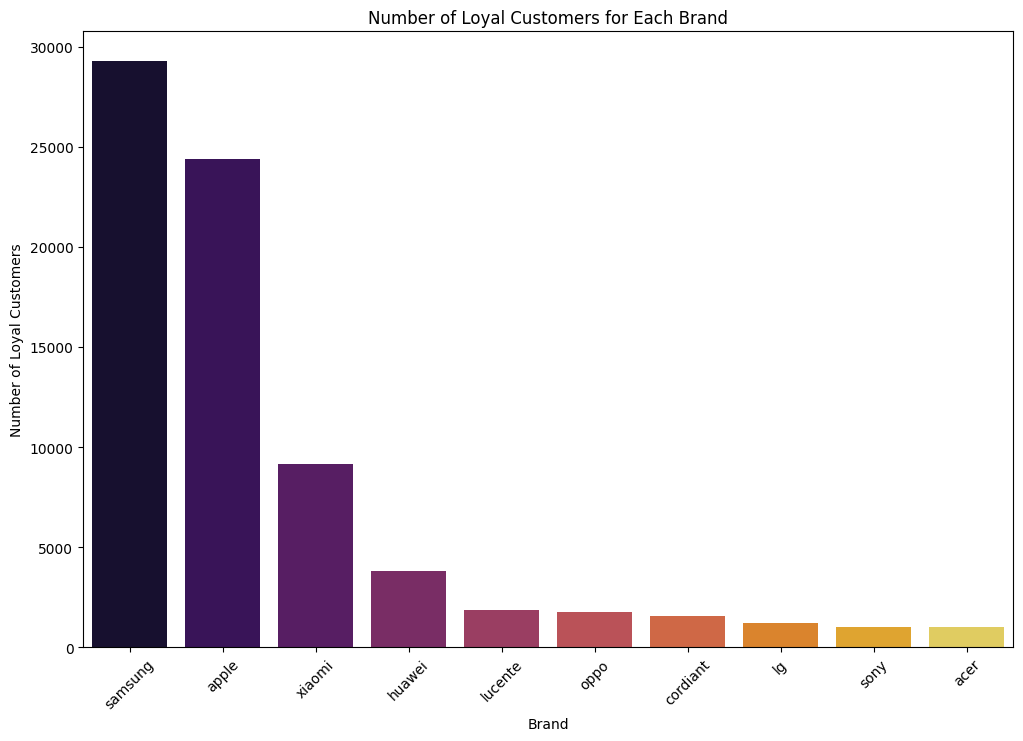

In [55]:
# Number of loyal customers for each brand
loyal_customers_count = loyal_customers['brand'].value_counts().reset_index().head(10)
loyal_customers_count.columns = ['brand', 'loyal_customers_count']

plt.figure(figsize=(12, 8))
sns.barplot(x='brand', y='loyal_customers_count', data=loyal_customers_count, hue='brand', palette='inferno', legend=False)
plt.xlabel('Brand')
plt.ylabel('Number of Loyal Customers')
plt.title('Number of Loyal Customers for Each Brand')
plt.xticks(rotation=45)
plt.show()


# When the person purchased the item, what other item did the person also purchase at the same time? (using the association rules)

Hypothesis: 

$H_0$: 

$H_1$: 

After performing a # test we got a P-value of # which is # than the alpha of 0.05 thus we # reject the null hypothesis. Which show that there are #.
